# Visualization 

In [47]:
# Importing Analysis Packages
import pandas as pd
import numpy as np
import seaborn as sn
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.model_selection import train_test_split
#import os
#os.getcwd()

## 1. Data and Notebook Setup

In [48]:
# Read Data
df = pd.read_csv('IMA Recommendation Simulation Data.csv')
# Drop Unnamed Column (this column just has index which python automatically gives us--- looks cleaner that way)
df = df.drop(['Unnamed: 0'], axis=1) # axis 0 = index & axis 1 = column
# Data heading (Looks good!)
df.head(10)

# Simular to previous for checking uniqueness of ID column
np.all(~df['request_id'].duplicated())
duplicateID = df[df.duplicated(['request_id'])]
# print("The Duplicate ID's are:", duplicateID)
duplicateID

# Rows 81224 and 81223 are not unique rows! I'll show them in next steeps
# show duplicate rows
df.loc[df['request_id']=="f0293ccd87b445f5989c6c68726608dc"] # We just need to drop one of them 

# Drop duplicate row
df = df.drop(index=81224) # Uncomment to get rid off the duplicate row, the below statement should read "True"  
# Check again
print("is request_id unique?:", len(df)==len(df['request_id'].unique())) 

# Checking if there are null values
df.isnull().sum().sort_values(ascending=False)

# Percentage of Total that's missing
df.isnull().sum().sort_values(ascending=False)/len(df)

# Start dealing with missing values
df_New = df.dropna()

# Checking if there are null values again
print(df_New.isnull().sum().sort_values(ascending=False))

# How many Rows were dropped?
print("\nNumber of Rows dropped:",len(df)-len(df_New))
print("Percentage of Rows dropped:",(len(df)-len(df_New))/len(df)) # evaluates to 3% of total

print("\nNew Count of Target Variable:\n", df_New['CurrentCondition'].value_counts())

# Counts before dropping missing values:
# Accepted                     96165
# Rejected                     37143
# Withdrawn                    23800
# Cancelled                     3388
# Waiting On Acceptance          800
# Waiting On Recommendation       95
# NoPace                          54
# Name: CurrentCondition, dtype: int64

# How much information lost for each catergory
print("Number of Rows omitted w/respect to target status:\n\n", 
      df['CurrentCondition'].value_counts()-df_New['CurrentCondition'].value_counts())

# df_New['week_id'].value_counts() # Count = 4
# df_New['weekday'].value_counts()   # Count = 7
# df_New['order_equipment_type'].value_counts() # Count = 2 (V & R)
# df_New['order_num_stops'].value_counts() # Count = 1 (Only "2" stops)
# df_New['color'].value_counts() # Count = 3 (RED, GREEN, YELLOW)
# df_New['origin_dat_ref'].value_counts() # Count = 712 (shows 5 most & 5 least pickup location)
# df_New['dest_dat_ref'].value_counts() # Count = 842 (shows 5 most & 5 least pickup location)


# print("CHECK: All ID Requests are Unique?",len(df_New['request_id'].value_counts())==len(df_New)) # Count = 842 (shows 5 most & 5 least pickup location)

is request_id unique?: True
CurrentCondition        0
est_cost_norm           0
rate_norm               0
dest_dat_ref            0
origin_dat_ref          0
color                   0
lead_days               0
order_origin_weight     0
order_num_stops         0
order_distance          0
order_equipment_type    0
miles                   0
weekday                 0
week_id                 0
request_id              0
dtype: int64

Number of Rows dropped: 4994
Percentage of Rows dropped: 0.030910733959718252

New Count of Target Variable:
 Accepted                     93506
Rejected                     35653
Withdrawn                    23255
Cancelled                     3256
Waiting On Acceptance          757
Waiting On Recommendation       87
NoPace                          54
Name: CurrentCondition, dtype: int64
Number of Rows omitted w/respect to target status:

 Accepted                     2659
Rejected                     1490
Withdrawn                     544
Cancelled            

## Explanatory Data Analysis

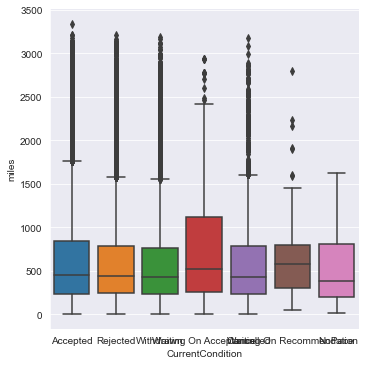

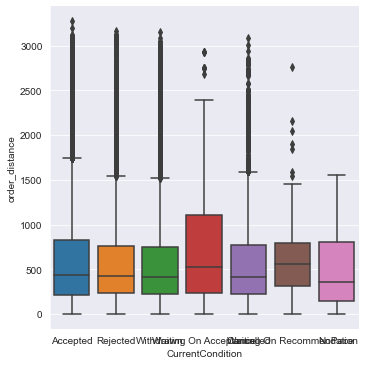

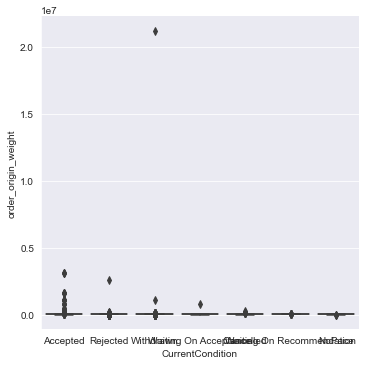

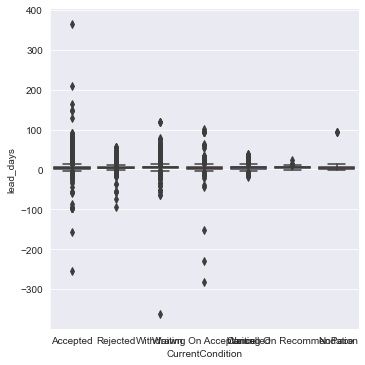

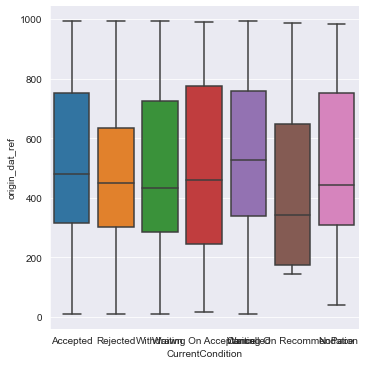

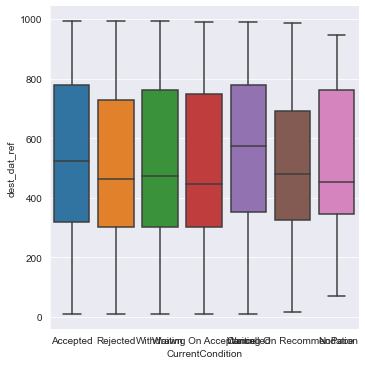

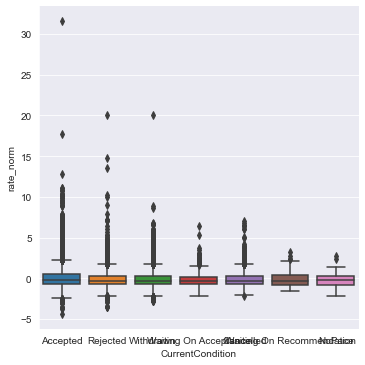

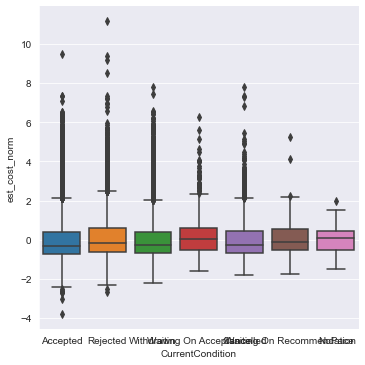

In [49]:
sn.catplot(x="CurrentCondition", y="week_id", kind="box", data=df_New)
sn.catplot(x="CurrentCondition", y="miles", kind="box", data=df_New)
sn.catplot(x="CurrentCondition", y="order_distance", kind="box", data=df_New)
sn.catplot(x="CurrentCondition", y="order_origin_weight", kind="box", data=df_New) 
sn.catplot(x="CurrentCondition", y="lead_days", kind="box", data=df_New) 
sn.catplot(x="CurrentCondition", y="origin_dat_ref", kind="box", data=df_New) 
sn.catplot(x="CurrentCondition", y="dest_dat_ref", kind="box", data=df_New) 
sn.catplot(x="CurrentCondition", y="rate_norm", kind="box", data=df_New)
sn.catplot(x="CurrentCondition", y="est_cost_norm", kind="box", data=df_New)

In [12]:
# # # Converting Values to appropriate Dtype
# # #----------------------------------------------#
df_New['week_id'] = df_New.week_id.astype('category')
df_New['weekday'] = df_New.weekday.astype('category')
df_New['order_equipment_type'] = df_New.order_equipment_type.astype('category')
df_New['order_num_stops'] = df_New.order_num_stops.astype('category')  #Supposed to 3 categories but dropping missing values caused us to have 1 only
df_New['color'] = df_New.color.astype('category')
df_New['origin_dat_ref'] = df_New.origin_dat_ref.astype('category')
df_New['dest_dat_ref'] = df_New.dest_dat_ref.astype('category')
df_New['CurrentCondition'] = df_New.CurrentCondition.astype('category')

# df_New["CurrentCondition"].unique()

# Small Caveat
# print(df["order_num_stops"].max())
# print(df_New["order_num_stops"].max())

# df_New.head()

<ipython-input-12-0655b438f884>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_New['week_id'] = df_New.week_id.astype('category')
<ipython-input-12-0655b438f884>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_New['weekday'] = df_New.weekday.astype('category')
<ipython-input-12-0655b438f884>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydat

AxesSubplot(0.125,0.125;0.775x0.755)


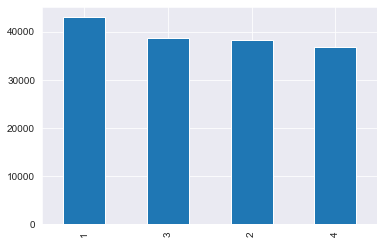

In [13]:
print(df_New['week_id'].value_counts().plot(kind='bar'))

# order_distance          4678
# rate_norm                181
# est_cost_norm             39
# order_origin_weight       19



AxesSubplot(0.125,0.125;0.775x0.755)


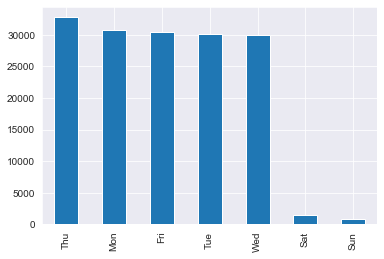

In [14]:
print(df_New['weekday'].value_counts().plot(kind='bar'))

AxesSubplot(0.125,0.125;0.775x0.755)


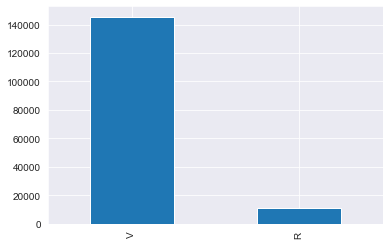

In [15]:
print(df_New['order_equipment_type'].value_counts().plot(kind='bar'))

AxesSubplot(0.125,0.125;0.775x0.755)


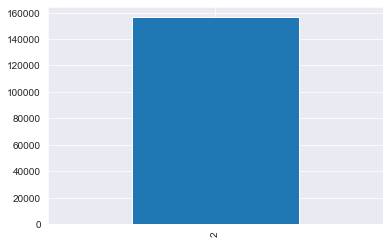

In [16]:
print(df_New['order_num_stops'].value_counts().plot(kind='bar'))

AxesSubplot(0.125,0.125;0.775x0.755)


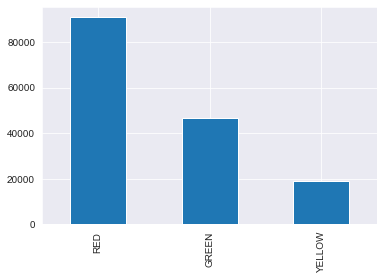

In [17]:
print(df_New['color'].value_counts().plot(kind='bar'))

AxesSubplot(0.125,0.125;0.775x0.755)


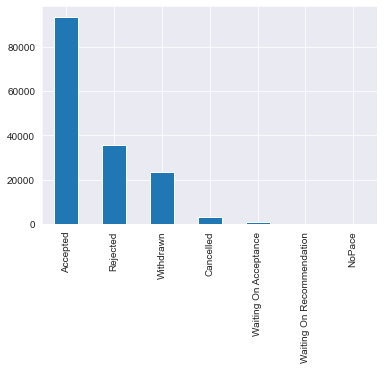

In [20]:
print(df_New['CurrentCondition'].value_counts().plot(kind='bar'))

## Histograms

(0.0, 5050.0)

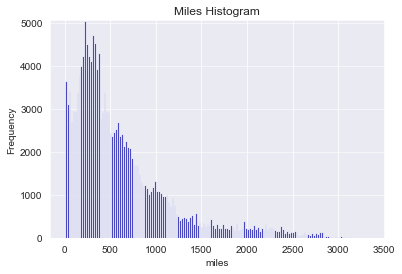

In [21]:
# #-1.----------Miles------------#
# # --------Normal Histogram-----#
n, bins, patches = plt.hist(x=df_New['miles'], bins='auto', color='#0504aa', 
                           alpha=0.7, rwidth=0.85)
plt.grid(axis='y', alpha=0.75)
plt.xlabel("miles")
plt.ylabel('Frequency')
plt.title('Miles Histogram')
maxfreq=n.max()
plt.ylim(ymax=np.ceil(maxfreq/10)*10 if maxfreq % 10 else maxfreq + 10)

(0.0, 5430.0)

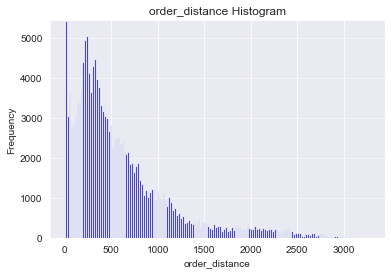

In [22]:
# #-2.----------order_distance------------#
n, bins, patches = plt.hist(x=df_New['order_distance'], bins='auto', color='#0504aa', 
                           alpha=0.7, rwidth=0.85)
plt.grid(axis='y', alpha=0.75)
plt.xlabel("order_distance")
plt.ylabel('Frequency')
plt.title('order_distance Histogram')
maxfreq=n.max()
plt.ylim(ymax=np.ceil(maxfreq/10)*10 if maxfreq % 10 else maxfreq + 10)

(0.0, 15830.0)

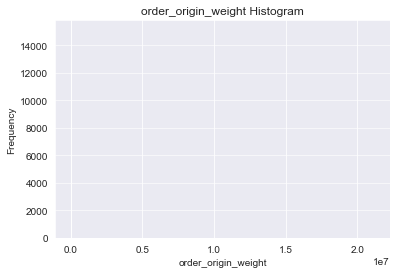

In [23]:
#-3.----------order_origin_weight------------#
n, bins, patches = plt.hist(x=df_New['order_origin_weight'], bins='auto', color='#0504aa', 
                           alpha=0.7, rwidth=0.85)
plt.grid(axis='y', alpha=0.75)
plt.xlabel("order_origin_weight")
plt.ylabel('Frequency')
plt.title('order_origin_weight Histogram')
maxfreq=n.max()
plt.ylim(ymax=np.ceil(maxfreq/10)*10 if maxfreq % 10 else maxfreq + 10)

(0.0, 19480.0)

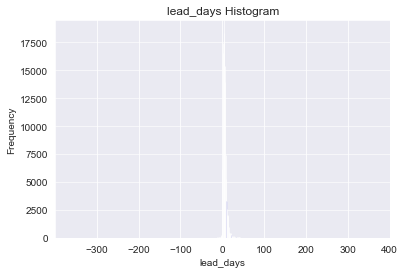

In [24]:
# #-4.----------lead_days------------#
n, bins, patches = plt.hist(x=df_New['lead_days'], bins='auto', color='#0504aa', 
                           alpha=0.7, rwidth=0.85)
plt.grid(axis='y', alpha=0.75)
plt.xlabel("lead_days")
plt.ylabel('Frequency')
plt.title('lead_days Histogram')
maxfreq=n.max()
plt.ylim(ymax=np.ceil(maxfreq/10)*10 if maxfreq % 10 else maxfreq + 10)

(0.0, 4660.0)

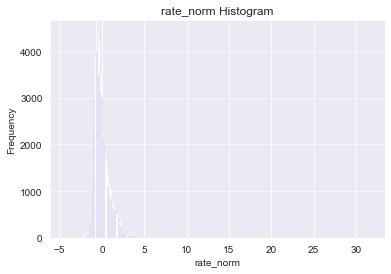

In [25]:
# # #-5.----------rate_norm------------#
n, bins, patches = plt.hist(x=df_New['rate_norm'], bins='auto', color='#0504aa', 
                           alpha=0.7, rwidth=0.85)
plt.grid(axis='y', alpha=0.75)
plt.xlabel("rate_norm")
plt.ylabel('Frequency')
plt.title('rate_norm Histogram')
maxfreq=n.max()
plt.ylim(ymax=np.ceil(maxfreq/10)*10 if maxfreq % 10 else maxfreq + 10)

(0.0, 4370.0)

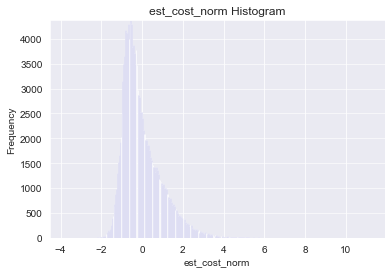

In [26]:
# #-6.----------est_cost_norm------------#
n, bins, patches = plt.hist(x=df_New['est_cost_norm'], bins='auto', color='#0504aa', 
                           alpha=0.7, rwidth=0.85)
plt.grid(axis='y', alpha=0.75)
plt.xlabel("est_cost_norm")
plt.ylabel('Frequency')
plt.title('est_cost_norm Histogram')
maxfreq=n.max()
plt.ylim(ymax=np.ceil(maxfreq/10)*10 if maxfreq % 10 else maxfreq + 10)


## Density Plot

C:\Users\abdul\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='miles', ylabel='Density'>

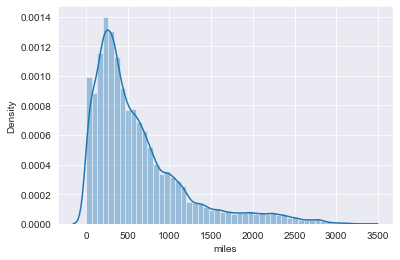

In [27]:
# # # ------Kernel Density--------#
sn.set_style('darkgrid')
sn.distplot(df_New['miles'])

C:\Users\abdul\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='order_distance', ylabel='Density'>

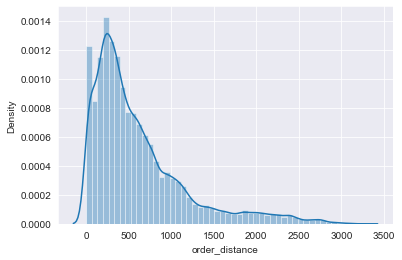

In [28]:
# # # # ------Kernel Density--------#
sn.set_style('darkgrid')
sn.distplot(df_New['order_distance'])

C:\Users\abdul\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='order_origin_weight', ylabel='Density'>

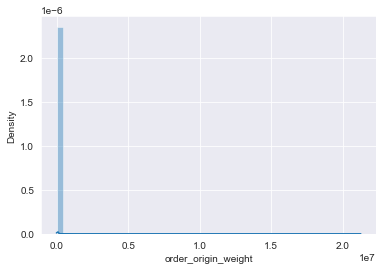

In [29]:
# # ------Kernel Density--------#
sn.set_style('darkgrid')
sn.distplot(df_New['order_origin_weight'])

C:\Users\abdul\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='lead_days', ylabel='Density'>

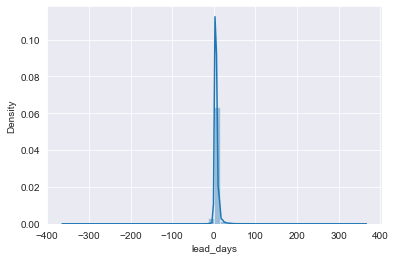

In [30]:
# # ------Kernel Density--------#
sn.set_style('darkgrid')  
sn.distplot(df_New['lead_days'])

C:\Users\abdul\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='rate_norm', ylabel='Density'>

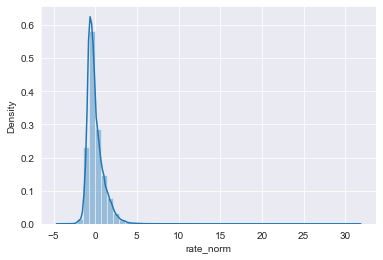

In [31]:
# # ------Kernel Density--------#
sn.set_style('darkgrid')
sn.distplot(df_New['rate_norm'])

C:\Users\abdul\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='est_cost_norm', ylabel='Density'>

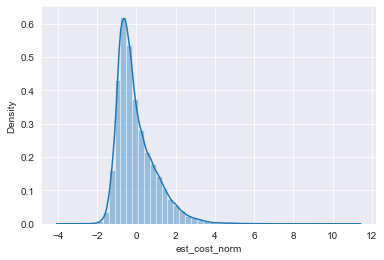

In [32]:
# # ------Kernel Density--------#
# # from scipy import stats # <--: we can add paramters: fit=stats.laplace, kde=False
sn.set_style('darkgrid')
sn.distplot(df_New['est_cost_norm'])

In [33]:
# # Multiple Variable Comparisons
df_New['order_origin_weight'].describe() # This varoable needs to normalized. min value and max value difer hugely

# 'color' Comparison Vars: miles,order_distance,order_origin_weight,lead_days,rate_norm,est_cost_norm
# g=sn.FacetGrid(df_New, col='color', hue='order_equipment_type')
# g.map(sn.scatterplot, 'order_origin_weight', 'miles') # dist for distribution plot


count    1.565680e+05
mean     3.506593e+04
std      5.813135e+04
min      1.000000e+00
25%      2.730950e+04
50%      4.104000e+04
75%      4.354400e+04
max      2.123052e+07
Name: order_origin_weight, dtype: float64

In [34]:
# df_New['log_order_origin_weight'].describe()
df_New.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 156568 entries, 0 to 161562
Data columns (total 15 columns):
 #   Column                Non-Null Count   Dtype   
---  ------                --------------   -----   
 0   request_id            156568 non-null  object  
 1   week_id               156568 non-null  category
 2   weekday               156568 non-null  category
 3   miles                 156568 non-null  int64   
 4   order_equipment_type  156568 non-null  category
 5   order_distance        156568 non-null  float64 
 6   order_num_stops       156568 non-null  category
 7   order_origin_weight   156568 non-null  float64 
 8   lead_days             156568 non-null  int64   
 9   color                 156568 non-null  category
 10  origin_dat_ref        156568 non-null  category
 11  dest_dat_ref          156568 non-null  category
 12  rate_norm             156568 non-null  float64 
 13  est_cost_norm         156568 non-null  float64 
 14  CurrentCondition      156568 non-nul

In [35]:
# Column Names
# length of numpy arraya
# head, *tail = yVar_df
# len(tail)
df_New["nom_weekday"] = pd.factorize(df_New["weekday"])[0] # Convert weekday to 0-6
df_New["nom_order_equipment_type"] = pd.factorize(df_New["order_equipment_type"])[0] # Convert order_equipment_type to binary 0/1 
df_New["nom_color"] = pd.factorize(df_New["color"])[0] # Convert color to binary 0/1/2 
df_New["nom_CurrentCondition"] = pd.factorize(df_New["CurrentCondition"])[0] # Convert color to binary 0/1/2 

# print(df_New.columns)
# print(df_New.info())

print(df_New['CurrentCondition'].value_counts())

print(df_New['nom_CurrentCondition'].value_counts())

df_New.head()

Accepted                     93506
Rejected                     35653
Withdrawn                    23255
Cancelled                     3256
Waiting On Acceptance          757
Waiting On Recommendation       87
NoPace                          54
Name: CurrentCondition, dtype: int64
0    93506
1    35653
2    23255
4     3256
3      757
5       87
6       54
Name: nom_CurrentCondition, dtype: int64


<ipython-input-35-77ecbcf5c91e>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_New["nom_weekday"] = pd.factorize(df_New["weekday"])[0] # Convert weekday to 0-6
<ipython-input-35-77ecbcf5c91e>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_New["nom_order_equipment_type"] = pd.factorize(df_New["order_equipment_type"])[0] # Convert order_equipment_type to binary 0/1
<ipython-input-35-77ecbcf5c91e>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using

,request_id,week_id,weekday,miles,order_equipment_type,order_distance,order_num_stops,order_origin_weight,lead_days,color,origin_dat_ref,dest_dat_ref,rate_norm,est_cost_norm,CurrentCondition,nom_weekday,nom_order_equipment_type,nom_color,nom_CurrentCondition
0,c2653eda11cd4d94879d1946392eb2b5,4,Sat,1856,V,1848.0,2,40000.0,3,RED,633,978,2.273442,2.138631,Accepted,0,0,0,0
1,65e3dcc84a2246e68ea8636a967b31b2,3,Mon,56,V,47.0,2,12729.0,3,RED,604,604,-0.971030,-1.017024,Rejected,1,0,0,1
2,0a86f005640a4204b46c95ca033a7ced,1,Fri,259,V,255.0,2,44176.0,3,RED,761,770,-0.393352,-0.475805,Accepted,2,0,0,0
3,1105b4bc7b444f7985d4ad810e7acbc2,3,Thu,71,V,68.0,2,39847.0,6,RED,187,180,-0.706546,-0.765855,Rejected,3,0,0,1
4,de538100bb0f4137961b9551640ef35e,3,Fri,1182,R,1183.0,2,34912.0,3,GREEN,972,922,1.014233,0.469273,Accepted,2,1,1,0


In [36]:
# # Size
# size = df.size

# # Shape
# shape = df.shape
  
# # printing size and shape
# print("Size = {}\nShape ={}\nShape[0] x Shape[1] = {}".
# format(size, shape, shape[0]*shape[1])) # discounting request_id & Target variable, we're left with 13 features.
# Out of those feature, 7 are categorical and 6 are numeric type.

# # Size                       Check variables Names to not use same variables as above for analysis
# size = df_New.size

# # Shape
# shape = df_New.shape
  
# # printing size and shape
# print("Size = {}\nShape ={}\nShape[0] x Shape[1] = {}".
# format(size, shape, shape[0]*shape[1])) # discounting request_id & Target variable, we're left with 13 features.
# # Out of those feature, 7 are categorical and 6 are numeric type.

In [37]:
print('"Count of "CurrentCondition = Withdrawn" with duplicate row:"',23800) # Count with duplicate row
print('"Count of "CurrentCondition = Withdrawn" without duplicate row:"',23799) # Count without duplicate row

"Count of "CurrentCondition = Withdrawn" with duplicate row:" 23800
"Count of "CurrentCondition = Withdrawn" without duplicate row:" 23799


In [38]:
# Number of distinct catogories for the target var
# df['CurrentCondition'].value_counts()iable
df_New['CurrentCondition'].value_counts()


Accepted                     93506
Rejected                     35653
Withdrawn                    23255
Cancelled                     3256
Waiting On Acceptance          757
Waiting On Recommendation       87
NoPace                          54
Name: CurrentCondition, dtype: int64

In [40]:
# Checking Uniqueness of ID column (ID's not unique!)
print(len(df_New['request_id'].unique()))
print(len(df_New)) # There is ONLY 1 duplicate row in data with/respect to request_id

# The length of unique values (of request_id) is not equal to total length of dataframe
print("is request_id unique?:", len(df_New)==len(df_New['request_id'].unique()))

156568
156568
is request_id unique?: True


<function matplotlib.pyplot.show(close=None, block=None)>

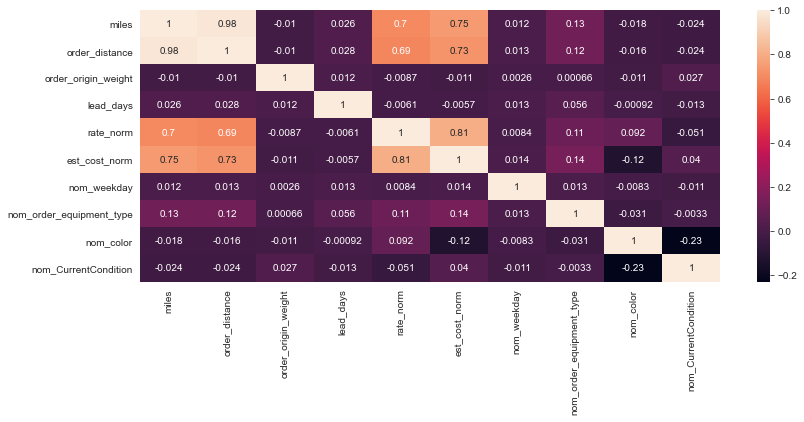

In [41]:
# Correlations
cor_matrix = df_New.corr()
plt.figure(figsize = (13,5))
sn.heatmap(cor_matrix, annot=True)
plt.show




# Highly Correlated Variables:
    # 1. Miles Correlated with order_distance, rate, & cost (.98,.7, & .74, respectively)
    # 2. Order_distance correlated miles with miles, rate, & cost (.98, .69, & .73, respectively)
    # 3. Origin_dat_ref correlated with des_dat_ref (.62) (Categorical Variable)
    # 4. rate_norm is correlated with cost (.8)

In [42]:
#sn.set();
#sn.pairplot(df, hue='CurrentCondition', height=1.5)
# sn.catplot(y="color",x="lead_days", hue="CurrentCondition", row="", data = df_New, height=5,aspect=0.8)


In [43]:
#sn.catplot(y="week_id",x="rate_norm", hue="CurrentCondition", data = df, height=5,aspect=0.8)

In [44]:
# Correlations
cor_matrix = xVar2_df.corr()
plt.figure(figsize = (13,5))
sn.heatmap(cor_matrix, annot=True)
plt.show

NameError: name 'xVar2_df' is not defined

In [ ]:
# from sklearn.linear_model import LogisticRegression
# from sklearn.multiclass import OneVsRestClassifier
# clf2 = LogisticRegression(max_iter=100)